<a href="https://colab.research.google.com/github/akbarehsani/backsample2/blob/master/simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


OrderedDict([('0.weight', tensor([[1.9584]])), ('0.bias', tensor([1.0215]))])


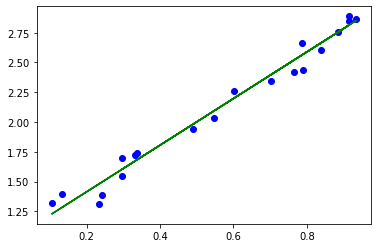

In [ ]:
import torch
import torch.nn as nn
from matplotlib import  pyplot as plt
torch.random.manual_seed(42)
x=torch.rand(100,1)
y=1+2*x+.1*torch.randn(100,1)
idx=torch.randperm(100)
train_idx,val_idx=idx[:80],idx[80:]
x_train=x[train_idx]
y_train=y[train_idx]
x_val=x[val_idx]
y_val=y[val_idx]
lr=1e-1
lreg_model=nn.Sequential(
    nn.Linear(1,1)
)
lreg_model.train()
optimizer=torch.optim.SGD(lreg_model.parameters(),lr=lr)
loss_fn=torch.nn.MSELoss()
n_epochs=1000
for epoch in range(n_epochs):
   yhat=lreg_model(x_train)
   loss=loss_fn(yhat,y_train)
   loss.backward()
   optimizer.step()
   optimizer.zero_grad()
print(lreg_model.state_dict())
x_train=x_train.detach().numpy()
# y=y.detach().numpy()
plt.plot(x_val,y_val,'bo')
yhat=lreg_model(x_val)
yhat=yhat.detach().numpy()
plt.plot(x_val,yhat,'g')
plt.show()
x=torch.rand(100,1)